In [1]:
# Estudiante 

#José Renán Acevedo Durán

In [2]:
#Cargar los dos CSV como datasets.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import csv

In [5]:
Informe_2015 = pd.read_csv('C:/Users/PC/OneDrive/Escritorio/Master Data Science/Herramientas Científico de datos/Examen/Caso Practico Python/2015.csv')

In [6]:
Informe_2016 = pd.read_csv('C:/Users/PC/OneDrive/Escritorio/Master Data Science/Herramientas Científico de datos/Examen/Caso Practico Python/2016.csv')

In [7]:
#Identificar las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [8]:
Informe_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [9]:
Informe_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [10]:
#Sí hay diferencias entre ambos datasets con respecto a las columnas 

In [11]:
#Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [12]:
Informe_total = pd.concat([Informe_2016, Informe_2015], 
                        ignore_index=True, join='outer')

In [13]:
Informe_total.head(4)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,NaN
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,NaN
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,NaN
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NaN


In [14]:
#Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [15]:
print("*CANTIDAD de datos nulos por columna en el dataframe")
print(Informe_total.isnull().sum())
print("----------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(Informe_total.isnull().sum()/len(Informe_total)*100)

*CANTIDAD de datos nulos por columna en el dataframe
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Lower Confidence Interval        158
Upper Confidence Interval        158
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Standard Error                   157
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Lower Confidence Interval        50.15873
Upper Confidence Interval        50.15873
Economy (GDP per Capita)          0.00000
Family                          

In [16]:
#Maximo de Lower Confidence Interval
Max_LCI = Informe_total['Lower Confidence Interval'].max()
print(Max_LCI)

7.46


In [17]:
#Minimo de Lower Confidence Interval
Min_LCI = Informe_total['Lower Confidence Interval'].min()
print(Min_LCI)

2.732


In [18]:
#Maximo de Upper Confidence Interval
Max_UCI = Informe_total['Upper Confidence Interval'].max()
print(Max_UCI)

7.669


In [19]:
#Minimo de Upper Confidence Interval
Min_UCI = Informe_total['Upper Confidence Interval'].min()
print(Min_UCI)

3.078


In [20]:
import random


In [21]:
rango_LCI = random.uniform(Min_LCI,Max_LCI)
print(rango_LCI)

3.1981446632269224


In [22]:
rango_UCI = random.uniform(Min_UCI,Max_UCI)
print(rango_UCI)

5.406606800123263


In [23]:
#Sustitución de valores nulos por valores obtenidos en los rangos min y max
Informe_total['Lower Confidence Interval'] = Informe_total['Lower Confidence Interval'].fillna(rango_LCI)

In [24]:
#Sustitución de valores nulos por valores obtenidos en los rangos min y max
Informe_total['Upper Confidence Interval'] = Informe_total['Upper Confidence Interval'].fillna(rango_UCI)

In [25]:
Informe_total.isnull().sum()

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Lower Confidence Interval          0
Upper Confidence Interval          0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Standard Error                   157
dtype: int64

In [26]:
#Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [27]:
#Obtener media al cuadrado del Standard Error

Informe_total_NN = Informe_total['Standard Error'].dropna()
Informe_total_No_Nulos = Informe_total_NN.mean()**2
print(Informe_total_No_Nulos)

0.002292948979494474


In [28]:
Informe_total_final = Informe_total.fillna(Informe_total_No_Nulos)

In [29]:
#Obtén un resumen estadístico del dataframe sin valores nulos.
Informe_total_final.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
310       Rwanda               Sub-Saharan Africa             154   
311        Benin               Sub-Saharan Africa             155   
312        Syria  Middle East and Northern Africa             156   
313      Burundi               Sub-Saharan Africa             157   
314         Togo               Sub-Saharan Africa             158   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                   7.460000            

Text(0.5, 1.0, 'Relación entre la familia y la salud')

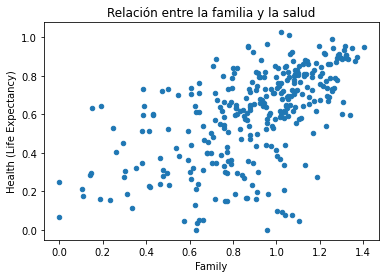

In [30]:
#Muestra de forma gráfica la relación entre la familia y la salud.
Informe_total_final.plot.scatter(x='Family', y='Health (Life Expectancy)')
plt.title(label='Relación entre la familia y la salud')

Text(0.5, 1.0, 'Relación entre la puntuación de felicidad y la confianza (corrupción del gobierno)')

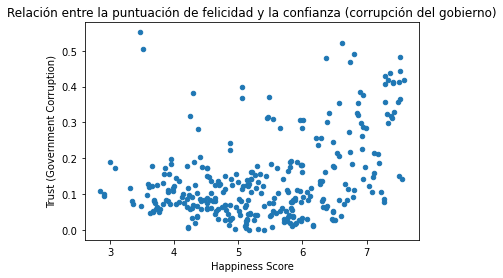

In [31]:
#Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
Informe_total_final.plot.scatter(x='Happiness Score', y='Trust (Government Corruption)')
plt.title(label='Relación entre la puntuación de felicidad y la confianza (corrupción del gobierno)') 

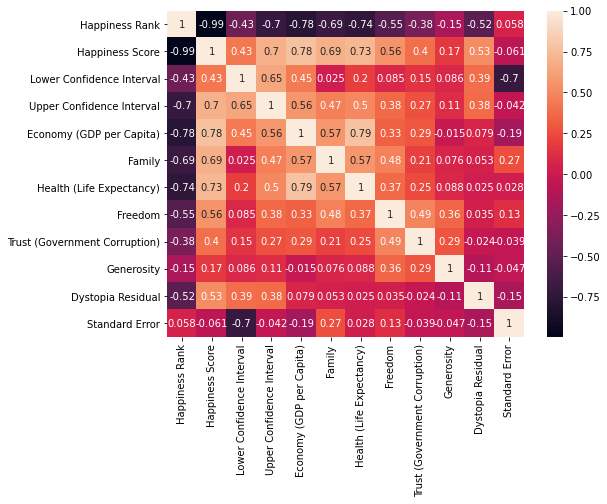

In [32]:
#Muestra la matriz de correlación del daframe.
corr_df = Informe_total_final.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [33]:
#Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

Informe_total_final_df = Informe_total_final.sort_values(['Country','Happiness Score',])
Informe_total_final_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Standard Error
153,Afghanistan,Southern Asia,154,3.360,3.288000,3.432000,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,0.002293
309,Afghanistan,Southern Asia,153,3.575,3.198145,5.406607,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,0.030840
108,Albania,Central and Eastern Europe,109,4.655,4.546000,4.764000,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,0.002293
251,Albania,Central and Eastern Europe,95,4.959,3.198145,5.406607,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,0.050130
224,Algeria,Middle East and Northern Africa,68,5.605,3.198145,5.406607,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,0.050990


Text(0.5, 1, 'Relación la felicidad con la generosidad')

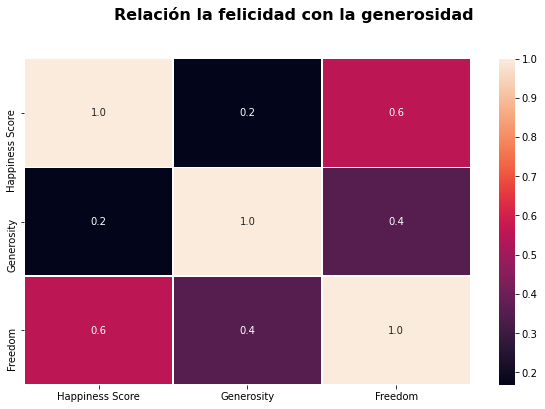

In [34]:
#¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.
f,ax = plt.subplots(figsize=(10, 6))
g = sns.heatmap(Informe_total_final[["Happiness Score", "Generosity", "Freedom"]].corr(),
            annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.suptitle("Relación la felicidad con la generosidad",
               fontsize=16, weight="bold", y=1)
